In [34]:
from sklearn.datasets import load_iris
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
# K-means 알고리즘으로 붓꽃 품종 구분하기

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length','petal_width'])

In [ ]:
KM = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

In [67]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [12]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()


target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

# silhouette 계수 측정

In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
sorted(score_samples,reverse=True)

iris_df['silhouette_coeff'] = score_samples
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582


In [21]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

## 실루엣 차트 

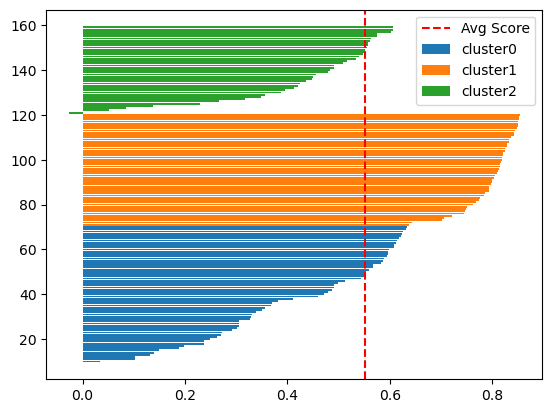

In [28]:
y_lower=10

for i in range(3):
    cluster_i = score_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower,y_upper),cluster_i, label=f'cluster{i}')
    y_lower = y_upper
    
avg_score = np.mean(score_samples)
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

# 엘보우 기법 scree plot

In [29]:
KM.inertia_

78.85566582597728

In [30]:
scree_df = iris_df[['sepal_length', 'sepal_width', 'petal_length','petal_width']]

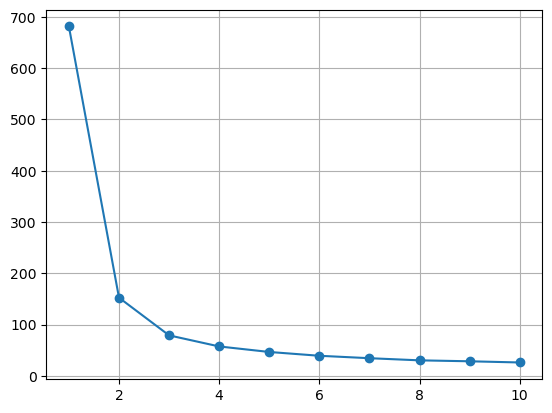

In [35]:
inertia = []
k_values = range(1,11)      
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

일반적으로 y축의 값이 80% 내외(즉, 설명력이 80%인)일 때, x축의 주성분의 개수를 선택하면 되는데 아래에서는 주성분의 개수가 3이 선정된다.

# PCA(Principal Component Analysis)

In [39]:
from sklearn.decomposition import PCA

# PCA 객체 생성 (주성분 2개로 축소)
pca = PCA(n_components=2)

# 데이터 변환
X_pca = pca.fit_transform(iris.data)

# 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [45]:
X_pca[:,0], X_pca[:,1]

(array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
        -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
        -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
        -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
        -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
        -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
        -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
        -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
        -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
        -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
         1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
         0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
        -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
         0.92786078,  0.66028376,  0.23610499,  0.9

In [40]:
iris_df['pca_x'] = X_pca[:,0]
iris_df['pca_y'] = X_pca[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


In [ ]:
PCA 결과 시각화

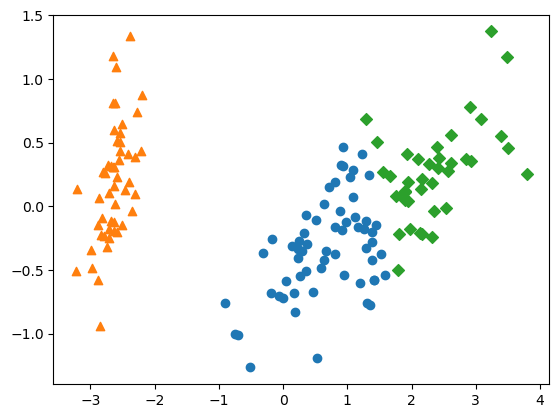

In [54]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='^')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='D')

plt.show()

In [56]:
# StandardScaler로 스케일링
# PCA 2개로 축소
# 시각화 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaler = scaler.fit_transform(iris.data)

In [57]:
iris_df['pca_x_scaled'] = x_scaler[:,0]
iris_df['pca_y_scaled'] = x_scaler[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-1.021849,1.249201


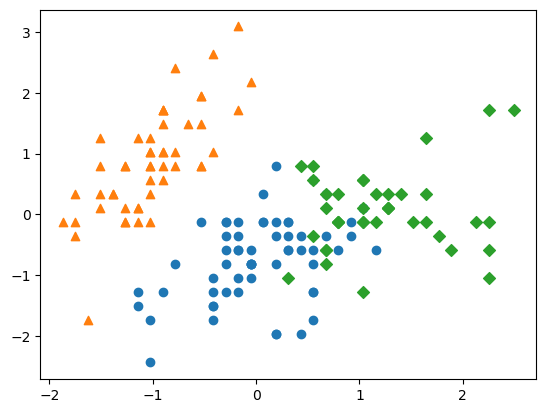

In [58]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x_scaled'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y_scaled'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x_scaled'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y_scaled'], marker='^')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x_scaled'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y_scaled'], marker='D')

plt.show()

In [61]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [ ]:
pca_sc

# 클러스터링 실습

In [104]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [63]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [105]:
cr_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [69]:
cr_df.columns.unique()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'cluster'],
      dtype='object')

In [110]:
# pca 2개의 주성분

cr_means = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
cr_means.fit(cr_df)

KMeans(n_clusters=4, random_state=0)

In [111]:
cr_df['target'] = cancer.target
cr_df['cluster'] = cr_means.labels_
cr_df.groupby(['target', 'cluster'])['mean compactness'].count()

target  cluster
0       0           15
        1           87
        2           94
        3           16
1       0          305
        2           52
Name: mean compactness, dtype: int64

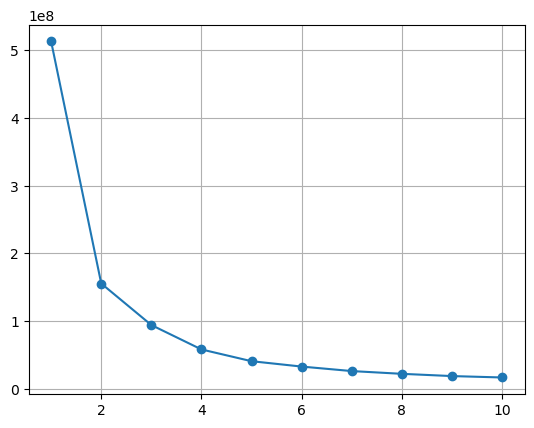

In [112]:
inertia = []
k_values = range(1,11)      
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(cr_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

In [167]:
# PCA 객체 생성 (주성분 2개로 축소)
pca = PCA(n_components=5)

# 데이터 변환
cr_pca1 = pca.fit_transform(cancer.data)

# 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


In [163]:
cr_df['pca_x'] = cr_pca1[:,0]
cr_df['pca_y'] = cr_pca1[:,1]
cr_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,1160.142574,-293.917544,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,995.793889,39.156743,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,930.341180,189.340742,1.750297,-1.151816


In [164]:
# 스켈일링

scaler = StandardScaler()

cr_scaler = scaler.fit_transform(cancer.data)

cr_df['pca_x_scaled'] = cr_scaler[:,0]
cr_df['pca_y_scaled'] = cr_scaler[:,1]
cr_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,1160.142574,-293.917544,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,995.793889,39.156743,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,930.341180,189.340742,1.750297,-1.151816


In [168]:
# PCA 객체 생성 (주성분 2개로 축소)
pca = PCA(n_components=5)

# 데이터 변환
cr_pca1 = pca.fit_transform(cr_scaler)

# 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


In [169]:
cr_df['pca_x'] = cr_pca1[:,0]
cr_df['pca_y'] = cr_pca1[:,1]
cr_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,9.192837,1.948583,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,2.387802,-3.768172,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,5.733896,-1.075174,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,7.122953,10.275589,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,3.935302,-1.948072,1.750297,-1.151816


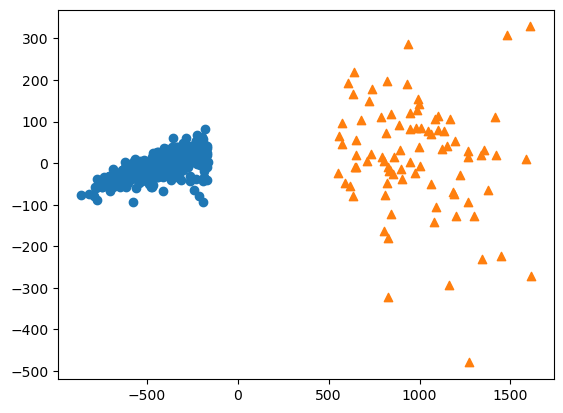

In [165]:
# 스케일링 전
plt.scatter(x=cr_df.loc[cr_df['cluster']==0, 'pca_x'],
            y=cr_df.loc[cr_df['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=cr_df.loc[cr_df['cluster']==1, 'pca_x'],
            y=cr_df.loc[cr_df['cluster']==1, 'pca_y'], marker='^')

plt.show()

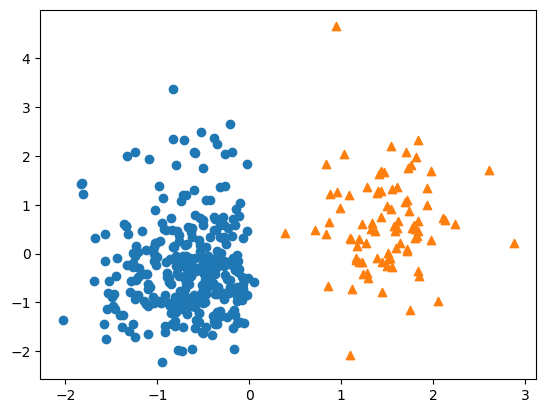

In [166]:
# 스켕일링 후

plt.scatter(x=cr_df.loc[cr_df['cluster']==0, 'pca_x_scaled'],
            y=cr_df.loc[cr_df['cluster']==0, 'pca_y_scaled'], marker='o')
plt.scatter(x=cr_df.loc[cr_df['cluster']==1, 'pca_x_scaled'],
            y=cr_df.loc[cr_df['cluster']==1, 'pca_y_scaled'], marker='^')


plt.show()

In [ ]:

# pca 2개의 주성분 , ... 그 이상 주성분 추출 
# explained_varinace_ratio_ 이 가장 높은 주성분의 갯수
# kmeans data = pca1, pca2, cluster =2 



주성분 4개 

In [136]:
cr_df_cp = cr_df.copy()

In [155]:

cr_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
cr_means.fit(cr_df_cp)

KMeans(n_clusters=2, random_state=0)

In [156]:
# PCA 객체 생성 (주성분 2개로 축소)
pca = PCA(n_components=4)

# 데이터 변환
cr_pca = pca.fit_transform(cancer.data)

# 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04]


In [157]:
cr_df_cp['target'] = cancer.target
cr_df_cp['cluster'] = cr_means.labels_
cr_df_cp.groupby(['target', 'cluster'])['mean compactness'].count()

target  cluster
0       0           82
        1          130
1       0          356
        1            1
Name: mean compactness, dtype: int64

In [158]:
cr_df_cp['pca_x'] = cr_pca1[:,0]
cr_df_cp['pca_y'] = cr_pca1[:,1]
cr_df_cp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,1160.142574,-293.917544,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,995.793889,39.156743,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,930.341180,189.340742,1.750297,-1.151816


In [173]:
# 스켈일링

scaler = StandardScaler()

cr_scaler = scaler.fit_transform(cancer.data)

cr_df_cp['pca_x_scaled'] = cr_scaler[:,0]
cr_df_cp['pca_y_scaled'] = cr_scaler[:,1]
cr_df_cp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,1160.142574,-293.917544,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,995.793889,39.156743,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,930.341180,189.340742,1.750297,-1.151816


In [174]:
# PCA 객체 생성 (주성분 2개로 축소)
pca = PCA(n_components=4)

# 데이터 변환
cr_pca = pca.fit_transform(cr_scaler)

# 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


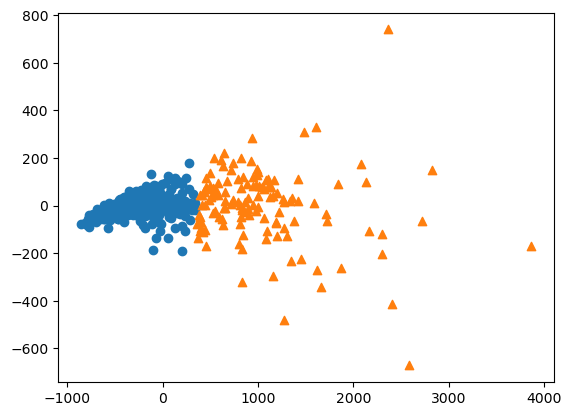

In [175]:
# 스케일링 전
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_x'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_x'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_y'], marker='^')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_x'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_y'], marker='D')

plt.show()

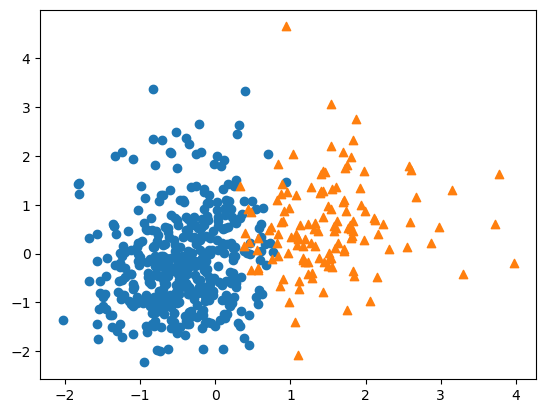

In [161]:
# 스켕일링 후

plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_x_scaled'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_y_scaled'], marker='o')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_x_scaled'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_y_scaled'], marker='^')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_y_scaled'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_y_scaled'], marker='D')


plt.show()

In [146]:
cr_df_cp['pca_x'] = cr_pca[:,0]
cr_df_cp['pca_y'] = cr_pca[:,1]
cr_df_cp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,1160.142574,-293.917544,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,995.793889,39.156743,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,930.341180,189.340742,1.750297,-1.151816


In [147]:
# 스켈일링

scaler = StandardScaler()

cr_scaler = scaler.fit_transform(cancer.data)

cr_df_cp['pca_x_scaled'] = cr_scaler[:,0]
cr_df_cp['pca_y_scaled'] = cr_scaler[:,1]
cr_df_cp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_x_scaled,pca_y_scaled
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,1,1160.142574,-293.917544,1.097064,-2.073335
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182,1.829821,-0.353632
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,1,995.793889,39.156743,1.579888,0.456187
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320,-0.768909,0.253732
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,1,930.341180,189.340742,1.750297,-1.151816


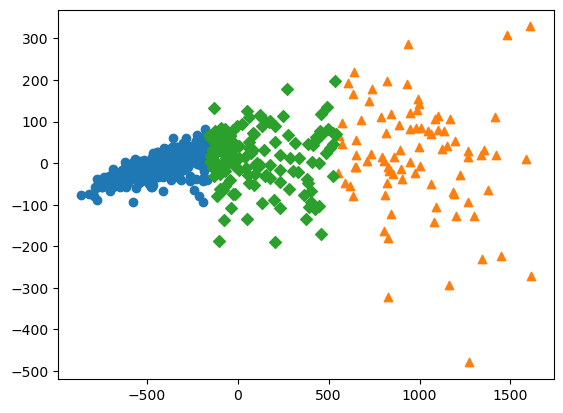

In [149]:
# 스케일링 전
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_x'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_x'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_y'], marker='^')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_x'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_y'], marker='D')

plt.show()

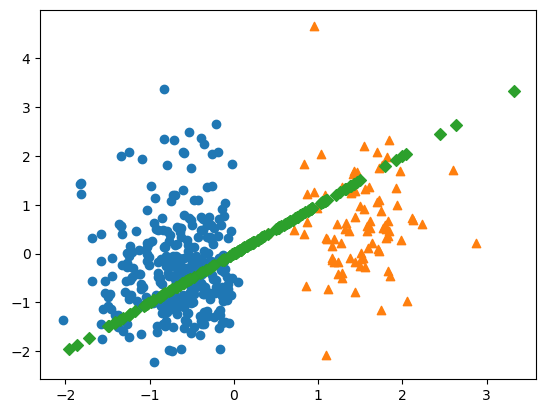

In [121]:
# 스켕일링 후

plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_x_scaled'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==0, 'pca_y_scaled'], marker='o')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_x_scaled'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==1, 'pca_y_scaled'], marker='^')
plt.scatter(x=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_y_scaled'],
            y=cr_df_cp.loc[cr_df_cp['cluster']==2, 'pca_y_scaled'], marker='D')


plt.show()

# DB scan 복잡한 분포를 가진 데이터의 클러스터링

In [177]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [179]:
x, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
x[:3]

array([[ 0.62251913, -0.37210134],
       [ 1.90426932, -0.13630295],
       [-0.06943128,  0.45611698]])

In [181]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.2)

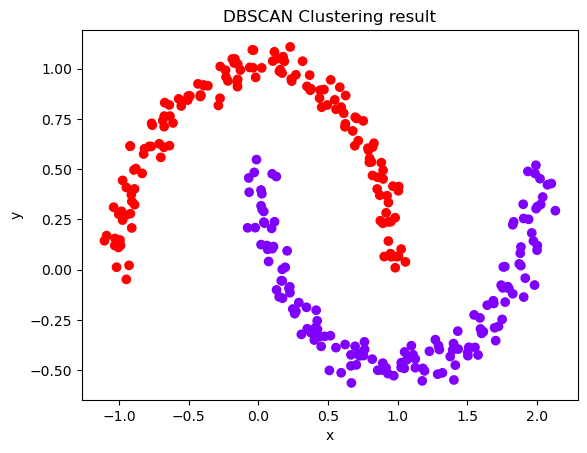

In [185]:
plt.scatter(x[:, 0], x[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.title("DBSCAN Clustering result")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [186]:
dbscan.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [191]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D', 'v']
    isNoise = False

    # 클러스터 중심이 있는 경우만 처리
    if iscenter and hasattr(clusterobj, 'clustercenters'):
        centers = clusterobj.clustercenters
    else:
        iscenter = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        # noise(-1) 여부 확인
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = f'Cluster {label}'

        marker_style = markers[label % len(markers)] if label != -1 else 'X'

        # 클러스터 점 찍기
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                    s=70, edgecolor='k', marker=marker_style, label=cluster_legend)

        # 중심 표시
        if iscenter and label != -1:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        edgecolor='k', alpha=0.9, marker=marker_style)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker=f'${label}$')

    plt.legend(loc='upper center' if isNoise else 'upper right')
    plt.title(f"Clustering result: {label_name}")
    plt.xlabel("ftr1 (PCA 1)")
    plt.ylabel("ftr2 (PCA 2)")
    plt.grid(True)
    plt.show()

In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]


In [192]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

KeyError: 'dbscan_cluster'

In [ ]:
iris_dbscan = DBSCAN(eps=0.3, min_samples=8, metric='euclidean')
dbscan_labels = iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)